# PAG compare trainings

Ok, so first off, we were *disappointed* with how bad the pag Db training looked when we added systematics and reoptimized the SR.

So... I'm going to try comparing the scalar sort (fucked buckets) and VEC sort (unfucked buckets) just to get some more intuition for this.

I'm going to start off by just comparing 4b rn tho.

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../code/']
from utils import mcToYr
from analysis import getXhh

from postprocess import significance

from plotting import SR_x, SR_y1, SR_y2
from plotting import CR_x, CR_y1, CR_y2
from plotting import SB_x, SB_y1, SB_y2
from eventDisplays import rainbow_text

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

Running w/ conda env: don't import root packages.


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


Since my intuition is for ntag_pag, let's start off by comparing this!!

In [7]:
f0_pag = uproot.open('../data/SeanFiles/Db_sort/pairAGraph/4b_ntag_pag/pairAGraph_Db_sort_17_NN_100_bootstraps.root')
f1_pag = uproot.open('../data/SeanFiles/Db_sort/pairAGraph/vector/4b_ntag_pag/data_PAG_Db_sort_vec_17_NN_100_bootstraps.root')

In [8]:
b0 = f0_pag['sig'].pandas.df()
b1 = f1_pag['sig'].pandas.df()

In [6]:
b0.head()

run_number  event_number  mc_sf  ntag  cosThetaStar  kinematic_region  \
entry                                                                          
0          327761     482946640      1   2.0     -0.085955                 0   
1          327761     486076202      1   2.0      0.599853                 0   
2          327761     484697146      1   2.0      0.322277                 0   
3          327761     486365568      1   2.0      0.563005                 0   
4          327761     483133317      1   2.0      0.991620                 0   

             m_hh    m_hh_cor  chosenPair          HT  ...  rw_to_4b  \
entry                                                  ...             
0      362.237330  253.016021         0.0  331.506069  ...      True   
1      365.473998  245.994438         1.0  238.695969  ...      True   
2      319.125773  237.416426         0.0  301.249989  ...      True   
3      597.375066  280.298240         0.0  464.654472  ...      True   
4      280.748677  263.359799         8.0  218.230953  ...      True   

       rw_to_4b_VR  NN_d24_weight_bstrap_med_17  \
entry                                             
0             True                     0.004944   
1             True                     0.004771   
2             True                     0.009945   
3             True                     0.025564   
4             True                     0.026126   

       NN_d24_weight_bstrap_perc_25_17  NN_d24_weight_bstrap_perc_75_17  \
entry                                                                     
0                             0.003932                         0.006165   
1                             0.003676                         0.006427   
2                             0.008446                         0.011636   
3                             0.021366                         0.030182   
4                             0.021551                         0.035009   

       NN_d24_weight_bstrap_IQR_17  NN_d24_weight_VRderiv_bstrap_med_17  \
entry                                                                     
0                         0.002233                             0.003049   
1                         0.002751                             0.007378   
2                         0.003189                             0.009526   
3                         0.008816                             0.013995   
4                         0.013459                             0.018254   

       NN_d24_weight_VRderiv_bstrap_perc_25_17  \
entry                                            
0                                     0.002398   
1                                     0.006332   
2                                     0.008613   
3                                     0.011184   
4                                     0.015438   

       NN_d24_weight_VRderiv_bstrap_perc_75_17  \
entry                                            
0                                     0.004043   
1                                     0.008651   
2                                     0.010897   
3                                     0.017894   
4                                     0.023735   

       NN_d24_weight_VRderiv_bstrap_IQR_17  
entry                                       
0                                 0.001645  
1                                 0.002319  
2                                 0.002284  
3                                 0.006710  
4                                 0.008298  

[5 rows x 68 columns]

In [9]:
for bi,fi in zip([b0,b1],[f0_pag,f1_pag]):
    bi['w_2b']    = bi['NN_d24_weight_bstrap_med_17']*fi[b'NN_norm_bstrap_med_17;1']._fVal
    bi['w_2b_VR'] = bi['NN_d24_weight_VRderiv_bstrap_med_17']*fi[b'NN_norm_VRderiv_bstrap_med_17;1']._fVal    

In [14]:
kwargs = {'histtype':'step', 'lw':2.5}

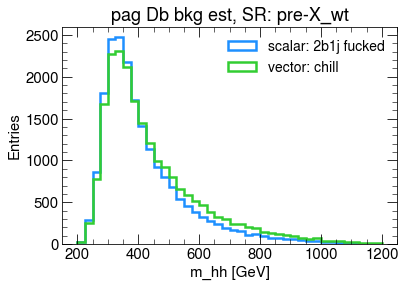

In [17]:
nb, r = 40, (200, 1200)

plt.hist(b0.loc[b0.ntag_pag==2,'m_hh'],nb,r,color='dodgerblue',
         label='scalar: 2b1j fucked',
         weights=b0.loc[b0.ntag_pag==2,'w_2b'],**kwargs)
plt.hist(b1.loc[b1.ntag_pag==2,'m_hh'],nb,r,color='limegreen',
         label='vector: chill',
         weights=b1.loc[b1.ntag_pag==2,'w_2b'],**kwargs)

plt.xlabel('m_hh [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('pag Db bkg est, SR: pre-X_wt')

plt.show()

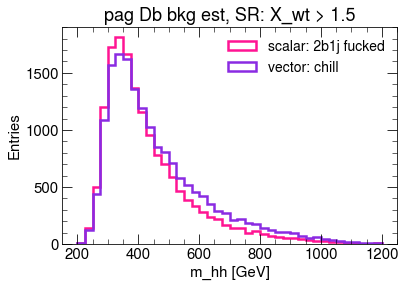

In [36]:
plt.hist(b0.loc[(b0.ntag_pag==2)&(b0.X_wt>1.5),'m_hh'],nb,r,color='deeppink',
         label='scalar: 2b1j fucked',
         weights=b0.loc[(b0.ntag_pag==2)&(b0.X_wt>1.5),'w_2b'],**kwargs)
plt.hist(b1.loc[(b1.ntag_pag==2)&(b1.X_wt>1.5),'m_hh'],nb,r,color='blueviolet',
         label='vector: chill',
         weights=b1.loc[(b1.ntag_pag==2)&(b1.X_wt>1.5),'w_2b'],**kwargs)

plt.xlabel('m_hh [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.title('pag Db bkg est, SR: X_wt > 1.5')
plt.show()

In [26]:
yr=17
from postprocess import calc_bstrap

In [32]:
e = np.linspace(*r,nb+1)
xx = 0.5 * (e[:-1] + e[1:])

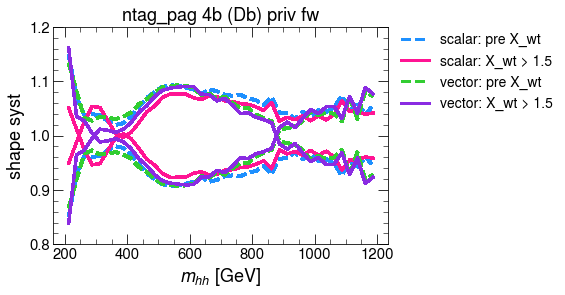

In [56]:
for bi,fi,s,c1s in zip([b0,b1],[f0_pag,f1_pag],['scalar','vector'],
                     [['dodgerblue','deeppink'],['limegreen','blueviolet']]):

    for bmask,c0,c1,ls,l in zip([bi.ntag_pag==2,(bi.X_wt > 1.5)&(bi.ntag_pag==2)],
                                ['k','grey'], c1s,['--','-'],
                                ['pre X_wt','X_wt > 1.5']):

        b    = np.histogram(bi.loc[bmask,'m_hh'],nb,r,weights=bi.loc[bmask,'w_2b'])[0]
        b_vr = np.histogram(bi.loc[bmask,'m_hh'],nb,r,weights=bi.loc[bmask,'w_2b_VR'])[0]

        norm     = fi[f'NN_norm_bstrap_med_{yr}']._fVal
        norm_IQR = fi[f'NN_norm_bstrap_IQR_{yr}']._fVal

        

        err =( 2*b - b_vr)/ b

        plt.plot(xx,err,c1,ls=ls,label=f'{s}: {l}')
        plt.plot(xx,2-err,c1,ls=ls)
    
plt.ylabel('shape syst',fontsize=18)
plt.xlabel('$m_{hh}$ [GeV]',fontsize=18)
plt.title(f'ntag_pag 4b (Db) priv fw')
plt.ylim(0.8,1.2)
plt.legend(bbox_to_anchor=(1,1.03))
plt.show()



Ok, this makes more sense. 
- The unfucked bucket has consistently *smaller* systematics at high $m_{hh}$. (I.e, green lower than blue pre Xwt and purple lower than pink post X_wt, again just at high m_hh)
- This could be b/c of the unfucked bucket *or* b/c the support is higher at high m_hh from the vector sort.
- We are still seeing the trend that the X_wt application *decreases* the systematic, although it is a small effect rn.

But - although the effect is smaller than it was for min(dR), this is kind of consistent w/ what Sean was seeing about these analysis changes (i.e, scalar vs vector) being a *bigger deal* for min(dR) than for pag.

(Possbily b/c mdr is a more hand engineered alg, while pag has more flexibility, but whether pag's flexibility is a good thing or a bad thing is still and *open Q*.)

In [41]:
for bi in [b0,b1]:
    bi['m_hh_cor2'] = bi['m_hh'] - bi['m_h1'] - bi['m_h2'] + 250
    bi['log_m_hh_cor2'] = np.log(bi['m_hh'] - bi['m_h1'] - bi['m_h2'])

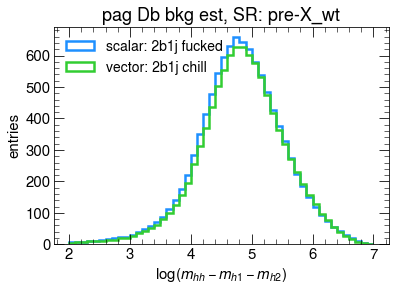

In [54]:
plt.hist(b0.loc[b0.ntag_pag==2,'log_m_hh_cor2'],50,(2,7),
         color='dodgerblue',label='scalar: 2b1j fucked',
         weights=b0.loc[b0.ntag_pag==2,'w_2b'],**kwargs)
plt.hist(b1.loc[b1.ntag_pag==2,'log_m_hh_cor2'],50,(2,7),
         color='limegreen',label='vector: 2b1j chill',
         weights=b1.loc[b1.ntag_pag==2,'w_2b'],**kwargs)
plt.xlabel('log($m_{hh}-m_{h1} - m_{h2}$)')
plt.ylabel('entries')
plt.legend(loc='upper left')
plt.title('pag Db bkg est, SR: pre-X_wt')
plt.show()

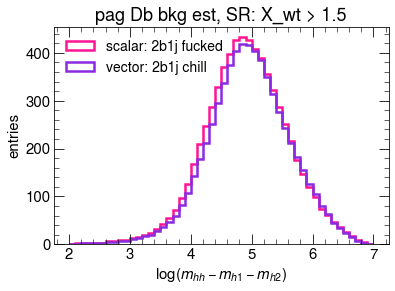

In [55]:
plt.hist(b0.loc[(b0.ntag_pag==2)&(b0.X_wt>1.5),'log_m_hh_cor2'],50,(2,7),
         color='deeppink',label='scalar: 2b1j fucked',
         weights=b0.loc[(b0.ntag_pag==2)&(b0.X_wt>1.5),'w_2b'],**kwargs)
plt.hist(b1.loc[(b1.ntag_pag==2)&(b1.X_wt>1.5),'log_m_hh_cor2'],50,(2,7),
         color='blueviolet',label='vector: 2b1j chill',
         weights=b1.loc[(b1.ntag_pag==2)&(b1.X_wt>1.5),'w_2b'],**kwargs)
plt.xlabel('log($m_{hh}-m_{h1} - m_{h2}$)')
plt.ylabel('entries')
plt.legend(loc='upper left')
plt.title('pag Db bkg est, SR: X_wt > 1.5')
plt.show()

Ok, this seems *chill* rn.

Slightly higher yield with the scalar instead of the vector sort b/c this one has higher yields in our anlaysis region. (Consisistent story). 

In [70]:
kr = np.arange(3)

ks = ['m_h1','m_h2','log_m_hh_cor2']

keys = [f'{k}_{ntag}b_{s}' for k,ntag,s in product(ks,[2,3,4],['pre','post'])]

jpt = {k:[] for k in keys}
vec = {k:[] for k in keys}


# Already can add on the options for the signal
ntag = 2

for k in ks:

    # pre X_wt
    jpt[f'{k}_{ntag}b_pre'].append(np.mean(b0.loc[b0.ntag_pag==ntag,k]))
    vec[f'{k}_{ntag}b_pre'].append(np.mean(b1.loc[b1.ntag_pag==ntag,k]))

    # post X_wt
    jpt[f'{k}_{ntag}b_post'].append(
        np.mean(b0.loc[(b0.ntag_pag==ntag)&(b0.X_wt>1.5),k]))
    vec[f'{k}_{ntag}b_post'].append(
        np.mean(b1.loc[(b1.ntag_pag==ntag)&(b1.X_wt>1.5),k]))

In [71]:
for tree in ['validation','control']:
    
    d0 = f0_pag[tree].pandas.df(['m_h1','m_h2','m_hh','ntag_pag','X_wt'])
    d1 = f1_pag[tree].pandas.df(['m_h1','m_h2','m_hh','ntag_pag','X_wt'])
    
    for di in [d0,d1]: 
        di['log_m_hh_cor2'] = np.log(di['m_hh'] - di['m_h1'] - di['m_h2'])
        
    for ntag in [2,3,4]:
        for k in ks:

            # pre X_wt
            jpt[f'{k}_{ntag}b_pre'].append(np.mean(d0.loc[d0.ntag_pag==ntag,k]))
            vec[f'{k}_{ntag}b_pre'].append(np.mean(d1.loc[d1.ntag_pag==ntag,k]))

            # post X_wt
            jpt[f'{k}_{ntag}b_post'].append(
                np.mean(d0.loc[(d0.ntag_pag==ntag) & (d0.X_wt > 1.5),k]))
            vec[f'{k}_{ntag}b_post'].append(
                np.mean(d1.loc[(d1.ntag_pag==ntag) & (d1.X_wt > 1.5),k]))

In [76]:
jpt[f'{k}_4b_pre'][1:],

([122.91722635022602],)

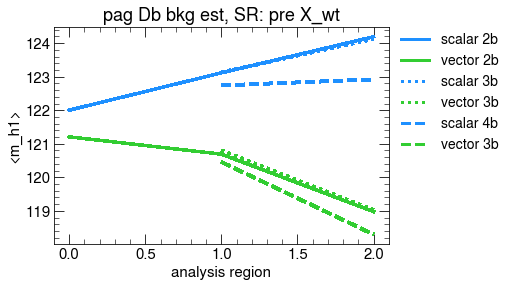

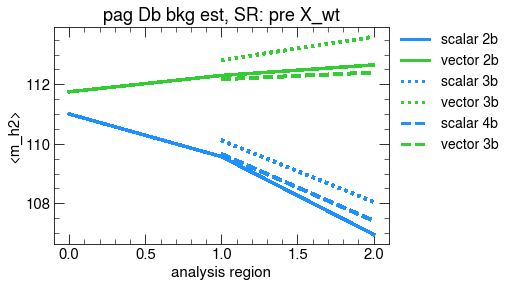

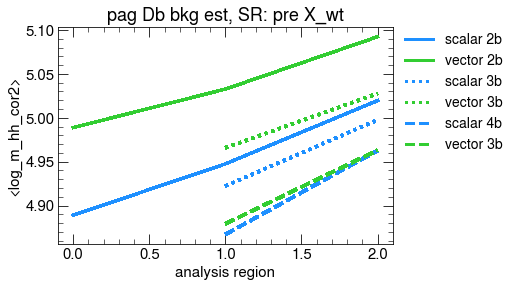

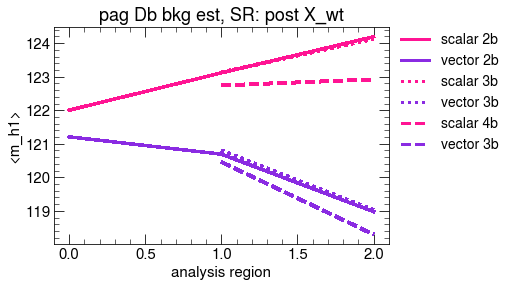

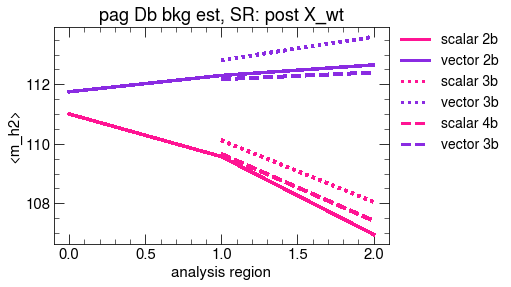

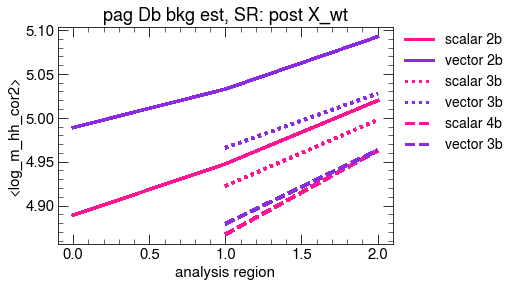

In [83]:
for s,c0,c1 in zip(['pre','post'],['dodgerblue','deeppink'],['limegreen','blueviolet']):

    for k in ks:

        plt.figure()
        plt.plot(kr,jpt[f'{k}_2b_pre'],color=c0,label='scalar 2b')
        plt.plot(kr,vec[f'{k}_2b_pre'],color=c1,label='vector 2b')


        plt.plot(kr[1:],jpt[f'{k}_3b_pre'],color=c0,ls='dotted',label='scalar 3b')
        plt.plot(kr[1:],vec[f'{k}_3b_pre'],color=c1,ls='dotted',label='vector 3b')

        plt.plot(kr[1:],jpt[f'{k}_4b_pre'],color=c0,ls='--',label='scalar 4b')
        plt.plot(kr[1:],vec[f'{k}_4b_pre'],color=c1,ls='--',label='vector 3b')

        plt.xlabel('analysis region')
        plt.ylabel(f'<{k}>')
        plt.legend(bbox_to_anchor=(1,1.03))
        plt.title(f'pag Db bkg est, SR: {s} X_wt')
        
        plt.savefig(f'figures/data17-JUN20-5jets/preLN_lr_0p003/systs-diagnostics/avg_{k}_{s}-X_wt.pdf',
                    bbox_to_anchor='tight')

- For m_h1, it seems like 3b is *way* closer to 2b than 4b
- For m_h2, 4b is quite a bit closer to 2b than 4b

- There's a huge difference b/w the options w/r.t. log(m_hh - m_h1 - m_h2)
- Also, we'd like these lines to be *flat*, rn it's not clear if they are or not.

**Open Q:** Does shifting the analysis regions to match the m_h1, m_h2 centers help match up the m_hh distribution??

But ok... I think we're starting to zone in on the issue now!!